In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [16]:
# Path of video.
import_path = r"C:\Users\calin\OneDrive\Desktop\ETTI Sem 1 AN IV\TDAV\Proiect\video.mp4"
# Video object.
Video = cv2.VideoCapture(import_path) 

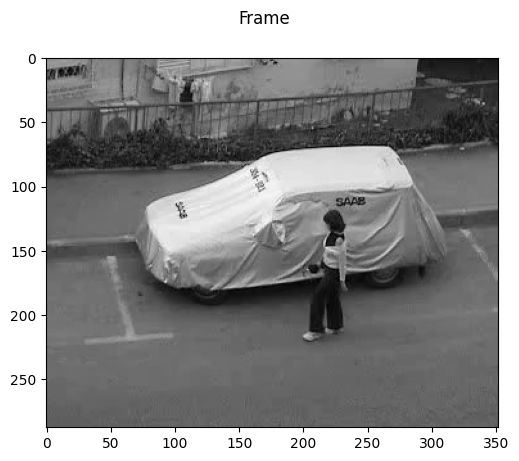

In [17]:
# Read one frame and display it.
ret,frame = Video.read()
if ret==True:
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    plt.figure()
    plt.imshow(frame, cmap='gray')
    plt.suptitle('Frame')
    plt.show()

In [18]:
print(frame.shape)

(288, 352)


(200, 200) <class 'numpy.ndarray'>


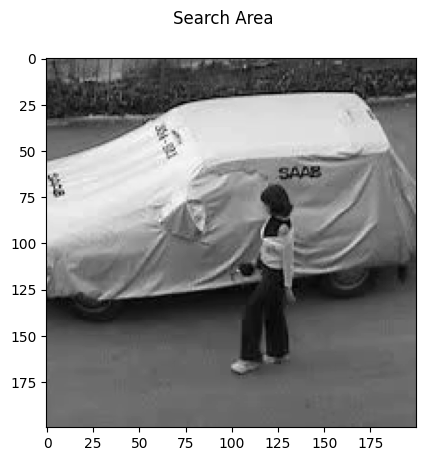

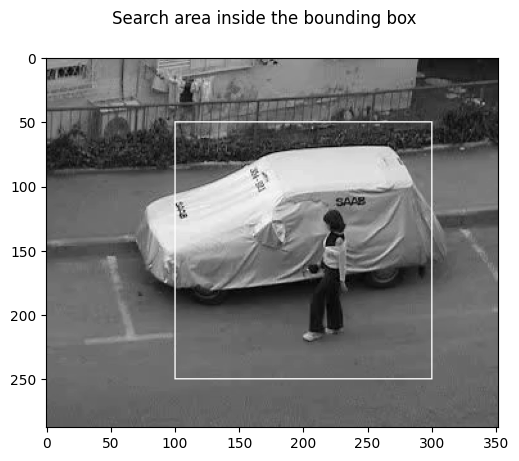

In [19]:
np_frame = frame.copy()
search_region = np.array(np_frame[50:250,100:300])
print(search_region.shape, type(search_region))
plt.figure()
plt.imshow(search_region,cmap='gray')
plt.suptitle('Search Area')
plt.show()

#print(np.max(search_region))

# Make a bounding box
start_point = (100,50)
end_point = (300,250)
bounded_frame = cv2.rectangle(np_frame, start_point, end_point, color= (255,0,0) , thickness=1) 
plt.figure()
plt.imshow(bounded_frame,cmap='gray')
plt.suptitle('Search area inside the bounding box')
plt.show()

(125, 75) <class 'numpy.ndarray'>


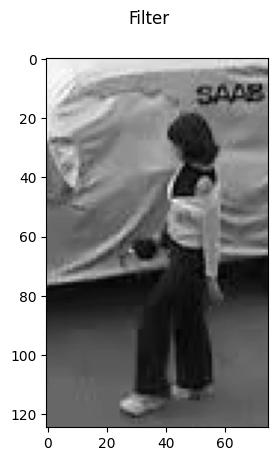

In [20]:
filter_img = search_region[50:175,75:150]
print(filter_img.shape,type(filter_img))
plt.figure()
plt.imshow(filter_img,cmap='gray')
plt.suptitle('Filter')
plt.show()

In [21]:
search_area_fft = np.fft.fft2(search_region)
magnitude_search_area_fft = 20 * np.log(abs(search_area_fft))

filter_img_fft = np.fft.fft2(filter_img, (200,200))
filter_img_fft_conj = np.conjugate(filter_img_fft)
magnitude_filter_img_fft_conj = 20 * np.log(abs(filter_img_fft_conj))

print(type(search_area_fft))
print(search_area_fft.shape, filter_img_fft.shape)

Corr_in_frequency_domain = search_area_fft * filter_img_fft_conj / abs(search_area_fft * filter_img_fft_conj)
magnitude_Corr_in_frequency_domain = 20 * np.log(abs(Corr_in_frequency_domain))

<class 'numpy.ndarray'>
(200, 200) (200, 200)


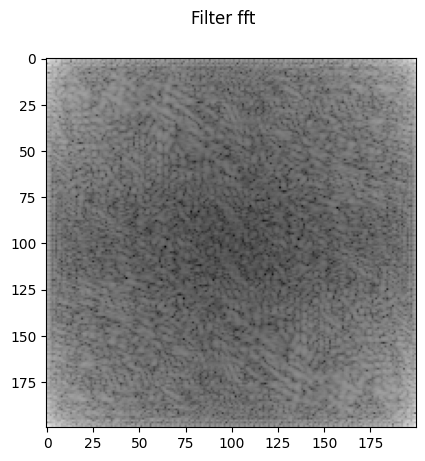

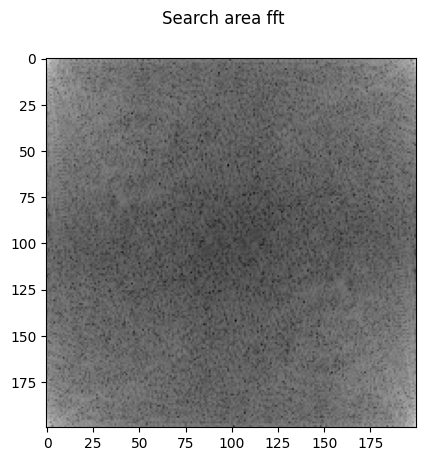

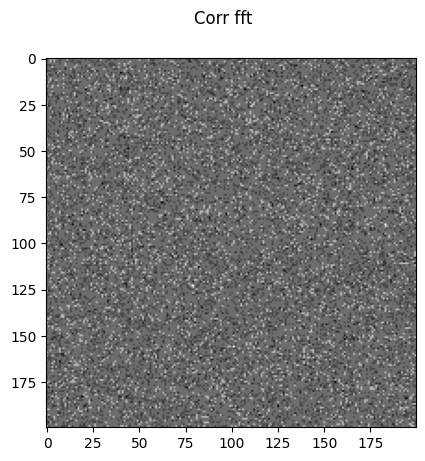

In [22]:
plt.figure()
plt.imshow(magnitude_filter_img_fft_conj, cmap='gray')
plt.suptitle('Filter fft')
plt.show()

plt.figure()
plt.imshow(magnitude_search_area_fft, cmap='gray')
plt.suptitle('Search area fft')
plt.show()

plt.figure()
plt.imshow(magnitude_Corr_in_frequency_domain, cmap='gray')
plt.suptitle('Corr fft')
plt.show()

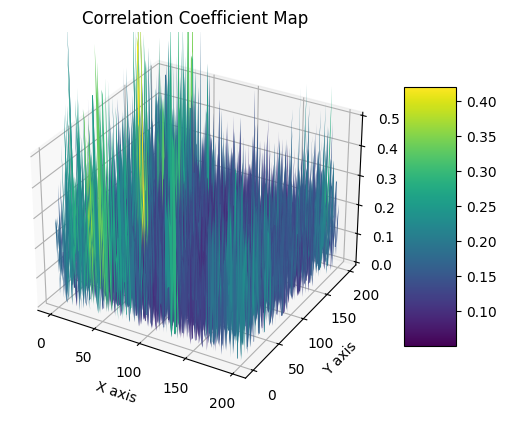

In [23]:
Corr_map = np.fft.ifft2(Corr_in_frequency_domain)
#Corr_map=np.fft.fftshift(Corr_map)
Corr_coeffs = abs(Corr_map)

height, width = Corr_coeffs.shape
x = np.arange(0, height, 1)
y = np.arange(0, width, 1)
x, y = np.meshgrid(x, y)

# Create the 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
surf = ax.plot_surface(y, x, 40*Corr_coeffs, cmap='viridis')
ax.set_zlim(0, 0.5)
fig.colorbar(surf, shrink=0.7, aspect=5)

# Customize the plot
ax.set_title('Correlation Coefficient Map')
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Correlation Coefficient')

# Show the plot
plt.show()

In [24]:
i, j = np.unravel_index(Corr_coeffs.argmax(), Corr_coeffs.shape)
print(Corr_coeffs[i][j])
print (i,j)

0.42442444018938413
50 75


In [25]:
# Compute bounding box.
start_point = np.array([i,j], dtype='int8')
end_point = start_point + np.array(filter_img.shape, dtype='int16')

print(filter_img.shape)
print(end_point)

object_location = cv2.rectangle(search_region, np.flip(start_point), np.flip(end_point), color=(255,0,0), thickness=1) 

(125, 75)
[175 150]


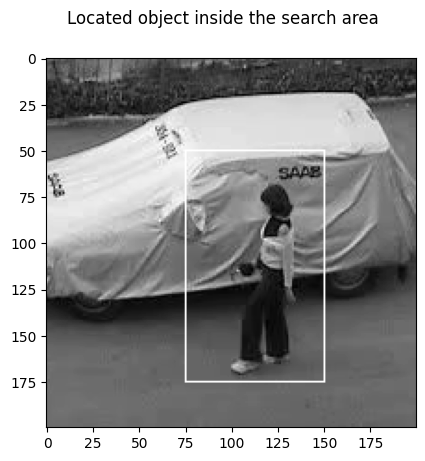

In [26]:
# Plot.
plt.figure()
plt.imshow(object_location, cmap='gray')
plt.suptitle('Located object inside the search area')
plt.show()